## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change your present working directory

In [0]:
file_path = "/content/drive/My Drive/R9_lab_internal_lstm/daily-minimum-temperatures-in-me.csv"

### Load your data file

In [0]:
import pandas as pd
temperature = pd.read_csv(file_path)

In [10]:
type(temperature['Date'][0])

str

#### Plot data

Text(0, 0.5, 'temperature')

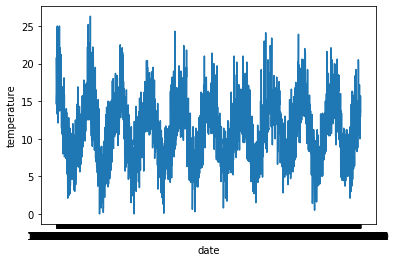

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(temperature['Date'], temperature['Temperature'])
plt.xlabel('date')
plt.ylabel('temperature')

#### Descibe your dataframe

In [11]:
temperature.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [0]:
for a in pd.isnull(temperature['Date']):
  # print(a)
  if(a == True):
    print(a)

In [0]:
for a in pd.isnull(temperature['Temperature']):
  # print(a)
  if(a == True):
    print(a)

#### Drop null values

In [26]:
# No null values
# just in case:
temperature.dropna()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71aa0bfc50>]],
      dtype=object)

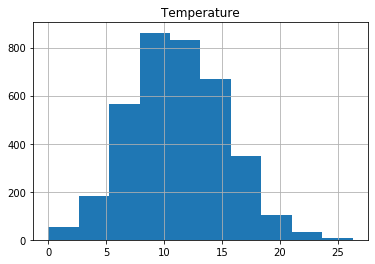

In [27]:
temperature.hist()

#### Check the maximum and minimum values

In [28]:
temperature.max()

Date           1990-12-31
Temperature          26.3
dtype: object

In [29]:
temperature.min()

Date           1981-01-01
Temperature             0
dtype: object

### Normalize the data

In [40]:
from sklearn import preprocessing
scaled_temperature = temperature
x = temperature[['Temperature']].values 

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print('@@@')
print(x_scaled)


@@@
[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]


In [0]:
scaled_temperature['Temperature'] = x_scaled

In [42]:
scaled_temperature.head()

,Date,Temperature
0,1981-01-01,0.787072
1,1981-01-02,0.680608
2,1981-01-03,0.714829
3,1981-01-04,0.555133
4,1981-01-05,0.600760


#### Check the maximum and minimum values of scaled data

In [43]:
scaled_temperature.max()

Date           1990-12-31
Temperature             1
dtype: object

In [44]:
scaled_temperature.min()

Date           1981-01-01
Temperature             0
dtype: object

#### Look into some of the scaled values

In [45]:
scaled_temperature.head()

,Date,Temperature
0,1981-01-01,0.787072
1,1981-01-02,0.680608
2,1981-01-03,0.714829
3,1981-01-04,0.555133
4,1981-01-05,0.600760


### Split data into Training and Testing

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(temperature, test_size=0.2, random_state=2)


#### Print train and test size

In [52]:
print(x_train.shape)
print(x_test.shape)

(2920, 2)
(730, 2)


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(data):
  X = data['Temperature']
  y = data.shift(-1)['Temperature']
  return X,y

#### Use function to get training and test set

In [0]:
X_train, y_train = create_dataset(x_train)

In [0]:
X_test, y_test = create_dataset(x_test)

In [0]:
y_train[3240] = y_train.mean()

In [111]:
X_train.shape[0]

2920

In [0]:
y_test[514] = y_test.mean()

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [0]:
import numpy as np
X_train = np.reshape(np.array(X_train),(X_train.shape[0],1,1))

In [117]:
X_train.shape

(2920, 1, 1)

In [0]:
y_test = np.reshape(np.array(y_test),(y_test.shape[0],1))

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [94]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [0]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


### Summarize your model

In [141]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [152]:
model.fit(X_train, y_train, epochs=200, verbose=0)

## Make Predictions and Evaluate your model

In [0]:
X_test = np.reshape(np.array(X_test),(X_test.shape[0],1,1))

In [145]:
X_test.shape

(730, 1, 1)

In [153]:
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[0.42882115]
 [0.4286282 ]
 [0.42867565]
 [0.42860284]
 [0.42882115]
 [0.42854607]
 [0.4288391 ]
 [0.4289065 ]
 [0.42889968]
 [0.42819208]
 [0.4289062 ]
 [0.42884648]
 [0.4289015 ]
 [0.42808673]
 [0.42885208]
 [0.42852005]
 [0.42865002]
 [0.42887914]
 [0.42871642]
 [0.428748  ]
 [0.42834234]
 [0.42889756]
 [0.42877293]
 [0.4287187 ]
 [0.42885745]
 [0.4283599 ]
 [0.4288932 ]
 [0.4288981 ]
 [0.42842728]
 [0.4288195 ]
 [0.42890555]
 [0.4288801 ]
 [0.4287573 ]
 [0.42890304]
 [0.4284245 ]
 [0.42788646]
 [0.42889968]
 [0.42889756]
 [0.42861307]
 [0.42850527]
 [0.4289034 ]
 [0.4282667 ]
 [0.4289019 ]
 [0.42880684]
 [0.42864048]
 [0.42878333]
 [0.42890304]
 [0.42826945]
 [0.42865002]
 [0.4286282 ]
 [0.42890435]
 [0.4285173 ]
 [0.42839137]
 [0.42844343]
 [0.4288838 ]
 [0.42860284]
 [0.42839414]
 [0.42857635]
 [0.42842728]
 [0.4288391 ]
 [0.42884648]
 [0.42813116]
 [0.42886254]
 [0.42888957]
 [0.42884055]
 [0.4287187 ]
 [0.42872876]
 [0.4288958 ]
 [0.42885745]
 [0.42861307]
 [0.4288751 ]
 [0.42

In [154]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.11902458192291403
0.0218437274638232
0.14779623629789496


## Plot the results

In [0]:
X_test_1 = np.reshape(np.array(X_test),(X_test.shape[0],1))

Text(0, 0.5, 'temperature')

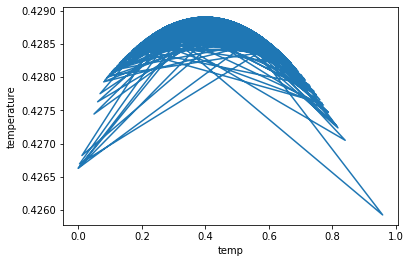

In [157]:
plt.plot(X_test_1, y_pred)
plt.xlabel('temp')
plt.ylabel('temperature')